In [1]:
# Importation des bibliothèques nécessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importation de

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm 
import scipy.stats as stats

In [3]:
# Importation des données

df = pd.read_csv("kc_house_data.csv")

# 1_Exploration des données

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [52]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.shape

(21613, 21)

In [7]:
df.dtypes.value_counts()

int64      15
float64     5
object      1
dtype: int64

In [8]:
df.isnull().sum().sum()

0

### Analyse de la forme:
- **Variable target**: price
- **Lignes et colonnes**: (21613, 21)
- **Types de variables**:int64 = 15 ,  float64 = 5  , object =  1
- **Analyse des valeurs manquantes**: 0. Il n'y a pas de valeurs manquantes.

### Nettoyage des données :

In [9]:
# il y'a beaucoup de "zéros" dans la colonne "yr_renovated" parce que beaucoup de maison n'ont pas été rénovées depuis leur construction. donc, dans ces cas, nous allons considérer que "yr_renovated"="yr_built"

df['yr_renovated']=df['yr_renovated'].mask(df['yr_renovated'].eq(0),df['yr_built'])

In [10]:
# à partir de yr_built et yr_renovated, créons les colonnes "age" et "age_renovated" en soustryant leurs valeurs de l'année actuelle (2022).

df['age'] = 2022 - df['yr_built']
df['age_renovated'] = 2022 - df['yr_renovated']
df = df.drop(['yr_built', 'yr_renovated'], axis=1)

In [11]:
# supprimons les variables qui ne nous semblent pas importants dans notre prediction.

df = df.drop(['id', 'date', 'zipcode', 'lat', 'long', 'waterfront', 'view'], axis = 1)


In [12]:
# nous allons aussi supprimer la colonne "sqft_basement" qui comporte beaucoup de "zéros".

df = df.drop(['sqft_basement'], axis = 1)

In [36]:
# Nous allons supprimer une valeur 'outlier' qui est '33' au niveau de "bedrooms".
df= df[df["bedrooms"]!=33]

In [37]:
# Vérifions si la valeur aberrante a bien été supprimée.
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [38]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_living15,sqft_lot15,age,age_renovated
count,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,5.400835e+05,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,3.409356,7.656904,1788.425319,1986.582871,12768.828984,50.993753,48.612761
std,3.671351e+05,0.907982,0.770177,918.456818,4.142142e+04,0.539991,0.650668,1.175477,828.094487,685.392610,27304.756179,29.373636,28.806961
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,399.000000,651.000000,7.000000,7.000000
25%,3.218375e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,1490.000000,5100.000000,25.000000,23.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,3.000000,7.000000,1560.000000,1840.000000,7620.000000,47.000000,45.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,4.000000,8.000000,2210.000000,2360.000000,10083.250000,71.000000,68.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,6210.000000,871200.000000,122.000000,122.000000


In [13]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_living15,sqft_lot15,age,age_renovated
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1340,5650,67,67
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1690,7639,71,31
2,180000.0,2,1.00,770,10000,1.0,3,6,770,2720,8062,89,89
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1360,5000,57,57
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1800,7503,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,3,8,1530,1530,1509,13,13
21609,400000.0,4,2.50,2310,5813,2.0,3,8,2310,1830,7200,8,8
21610,402101.0,2,0.75,1020,1350,2.0,3,7,1020,1020,2007,13,13
21611,400000.0,3,2.50,1600,2388,2.0,3,8,1600,1410,1287,18,18


- **Visualisation de la variable target :**

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

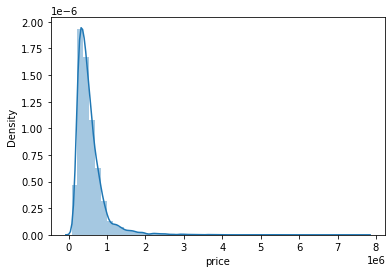

In [21]:
sns.distplot(df.price)


#### l'histogramme nous montre que la variable target "price" est normalement distribuée avec une longue queue.

# 

- **corrélation entre les différentes variables avec heatmap de seaborn :**

In [35]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_living15,sqft_lot15,age,age_renovated
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.036362,0.667434,0.605567,0.585379,0.082447,-0.054012,-0.105755
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,0.028472,0.356967,0.477600,0.391638,0.029244,-0.154178,-0.165506
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,-0.124982,0.664983,0.685342,0.568634,0.087175,-0.506019,-0.537164
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,-0.058753,0.762704,0.876597,0.756420,0.183286,-0.318049,-0.343745
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,-0.008958,0.113621,0.183512,0.144608,0.718557,-0.053080,-0.052911
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,-0.263768,0.458183,0.523885,0.279885,-0.011269,-0.489319,-0.505408
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,1.000000,-0.144674,-0.158214,-0.092824,-0.003406,0.361417,0.396358
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,-0.144674,1.000000,0.755923,0.713202,0.119248,-0.446963,-0.460796
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,-0.158214,0.755923,1.000000,0.731870,0.194050,-0.423898,-0.435904
sqft_living15,0.585379,0.391638,0.568634,0.756420,0.144608,0.279885,-0.092824,0.713202,0.731870,1.000000,0.183192,-0.326229,-0.324579


In [39]:
def plot_correlation_map(df):
    corr=df.corr()
    s, ax=plt.subplots(figsize=(12,10))
    cmap=sns.diverging_palette(220,10,as_cmap=True)
    s=sns.heatmap(corr,cmap=cmap, square=True,cbar_kws={'shrink':.9},ax=ax,annot=True,annot_kws={'fontsize':12})

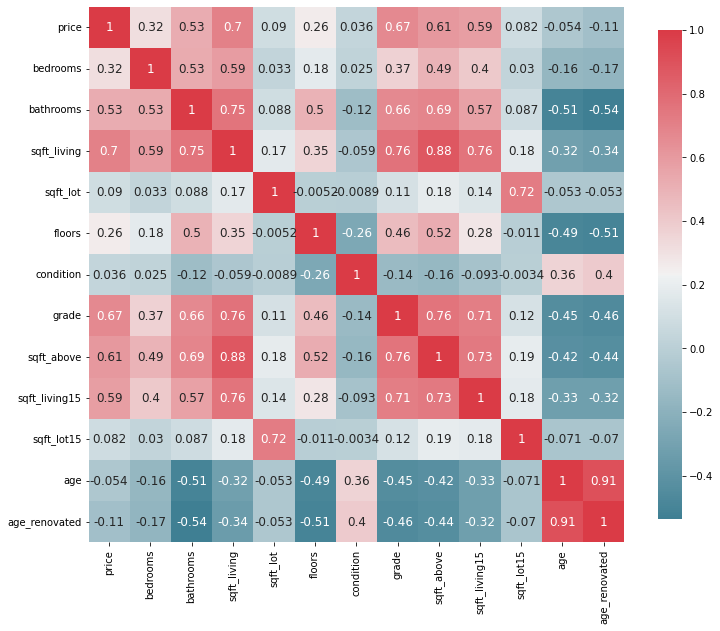

In [40]:
plot_correlation_map(df)

#### Nous voyons que les trois variables qui ont plus d'influence sur le prix de la maison sont -sqft_living (70%), - grade (67%) et  - sqft_above (61%).

# 



# 2_Sélection des fonctionnalités

#### Si on se refère au graphique de corrélation entre la variable target et les autres variables, nous pouvons choisir "sqft_living" (la surface de la maison) comme variable d'entrée pour prédire "price" (le prix de la maison) .


# 



# 3_Division de l'ensemble de données en un ensemble d'apprentissage et un ensemble de test

In [41]:
x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.20, random_state=30)

# 



# 4_Application de la régression linéaire à notre ensemble d'apprentissage

In [42]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# 



# 5_Traçons la régression linéaire

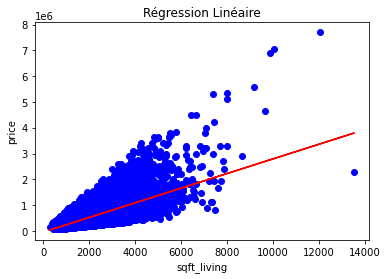

In [44]:
plt.scatter(x,y,color="b")
plt.title("Régression Linéaire")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x), color="r")
plt.show()

# 6_Mesurons la performance de la régression linéaire

In [45]:
from sklearn import metrics
predicted=model.predict(x_test)
print("MSE", metrics.mean_squared_error(y_test, predicted))
print("R squared", metrics.r2_score(y_test, predicted))

MSE 63626156706.1317
R squared 0.4689763547454001
